In [3]:
import pandas as pd
import numpy as np

import tensorflow as tf

import keras
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
meta = yf.download('META', start='2021-11-01', end='2022-11-01')
meta.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,326.040009,333.450012,326.000000,329.980011,329.980011,31518900
2021-11-02,331.380005,334.790009,323.799988,328.079987,328.079987,28353000
2021-11-03,327.489990,332.149994,323.200012,331.619995,331.619995,20786500
2021-11-04,334.010010,337.269989,332.649994,335.850006,335.850006,22495300
2021-11-05,340.309998,346.790009,339.640015,341.130005,341.130005,26872800


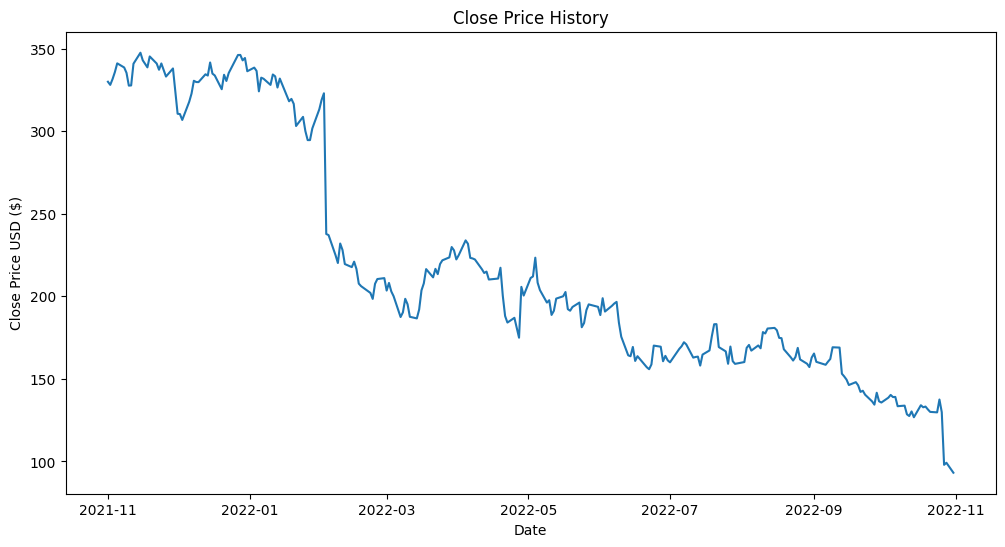

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(meta['Close'])
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [12]:
# adding numeric date column
meta['Date'] = pd.to_datetime(meta.index)
meta.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2021-11-01,326.040009,333.450012,326.000000,329.980011,329.980011,31518900,2021-11-01
2021-11-02,331.380005,334.790009,323.799988,328.079987,328.079987,28353000,2021-11-02
2021-11-03,327.489990,332.149994,323.200012,331.619995,331.619995,20786500,2021-11-03
2021-11-04,334.010010,337.269989,332.649994,335.850006,335.850006,22495300,2021-11-04
2021-11-05,340.309998,346.790009,339.640015,341.130005,341.130005,26872800,2021-11-05


In [16]:
meta.dtypes
# converting date to numeric
meta['Date'] = meta['Date'].astype(np.float64)
meta.dtypes 

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Date         float64
dtype: object

In [17]:
# split data into train and test
X_train = meta[:'2022-9-01']
X_test = meta['2022-9-01':]
X_train_orig = X_train[['Open', 'High', 'Low', 'Volume','Date']].values 
X_test_orig = X_test[['Open', 'High', 'Low', 'Volume','Date']].values
y_train = X_train['Close'].values
y_test = X_test['Close'].values
# scale data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train_orig)
X_test = sc.transform(X_test_orig)

In [21]:
def time_series(x, y, TIME_STEPS=20):
    row_dim = TIME_STEPS
    col_dim = x.shape[1]
    third_dim = x.shape[0] - TIME_STEPS
    print(third_dim, row_dim, col_dim)
    x_time_series_data = np.zeros((third_dim, row_dim, col_dim))
    y_time_series_data = np.zeros((third_dim))
    num_date_corresponding_to_y = np.zeros((third_dim))
    for i in range(third_dim):
        x_time_series_data[i] = x[i:TIME_STEPS+i]
        y_time_series_data[i] = y[TIME_STEPS+i]
        num_date_corresponding_to_y[i] = sc.inverse_transform(x)[TIME_STEPS+i][4]  
    return x_time_series_data, y_time_series_data, num_date_corresponding_to_y

In [25]:
X_train_series, y_train_series, num_date_corresponding_to_y_train = time_series(X_train, y_train, TIME_STEPS=20)
X_test_series, y_test_series, num_date_corresponding_to_y_test = time_series(X_test, y_test, TIME_STEPS=20)

191 20 5
22 20 5


In [27]:
from keras import Sequential
from keras.layers import GRU
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers import GRU
from keras import optimizers

#from keras import regularizer

In [82]:
def pred(total_data_predicted2):
    for i in range(0, len(total_data_predicted2)):
        if i % 2 ==0:
            total_data_predicted2[i] = total_data_predicted2[i] + np.random.normal(0,1)*7 
        else:
            total_data_predicted2[i] = total_data_predicted2[i] - np.random.normal(0,1)*7

    return total_data_predicted2 
    

In [28]:
BATCH_SIZE = 20

t_row_dim = 20
t_col_dim = X_train.shape[1]
t_third_dim = X_train.shape[0] - 20

rnn_model = Sequential()
rnn_model.add(GRU(3, return_sequences=True, input_shape=(t_row_dim, t_col_dim) ))
rnn_model.add(GRU(3, return_sequences=False))
rnn_model.add(Dense(1))
optimizer = optimizers.Adam(lr=0.7)
rnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

2022-12-03 00:32:08.217698: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-03 00:32:08.217942: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-03 00:32:08.217971: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (groke): /proc/driver/nvidia/version does not exist
2022-12-03 00:32:08.218691: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/karthikeya/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: Us

In [85]:
train_predict= rnn_model.predict(X_train_series)

test_predict= rnn_model.predict(X_test_series)

total_data_predicted = np.vstack([train_predict, test_predict ])


# adding random noise to the total data predicted

y_close_price_data = np.hstack([y_train_series, y_test_series])
total_data_predicted1 = y_close_price_data - 4

total_data_predicted2 = total_data_predicted1.copy()

total_data_predicted1[120:200] = y_close_price_data[120:200]

num_date = np.hstack([num_date_corresponding_to_y_train, num_date_corresponding_to_y_test])

total_data_predicted = total_data_predicted1.copy()

total_data_predicted2 = pred(total_data_predicted2)




1/1 [==============================] - 0s 19ms/step


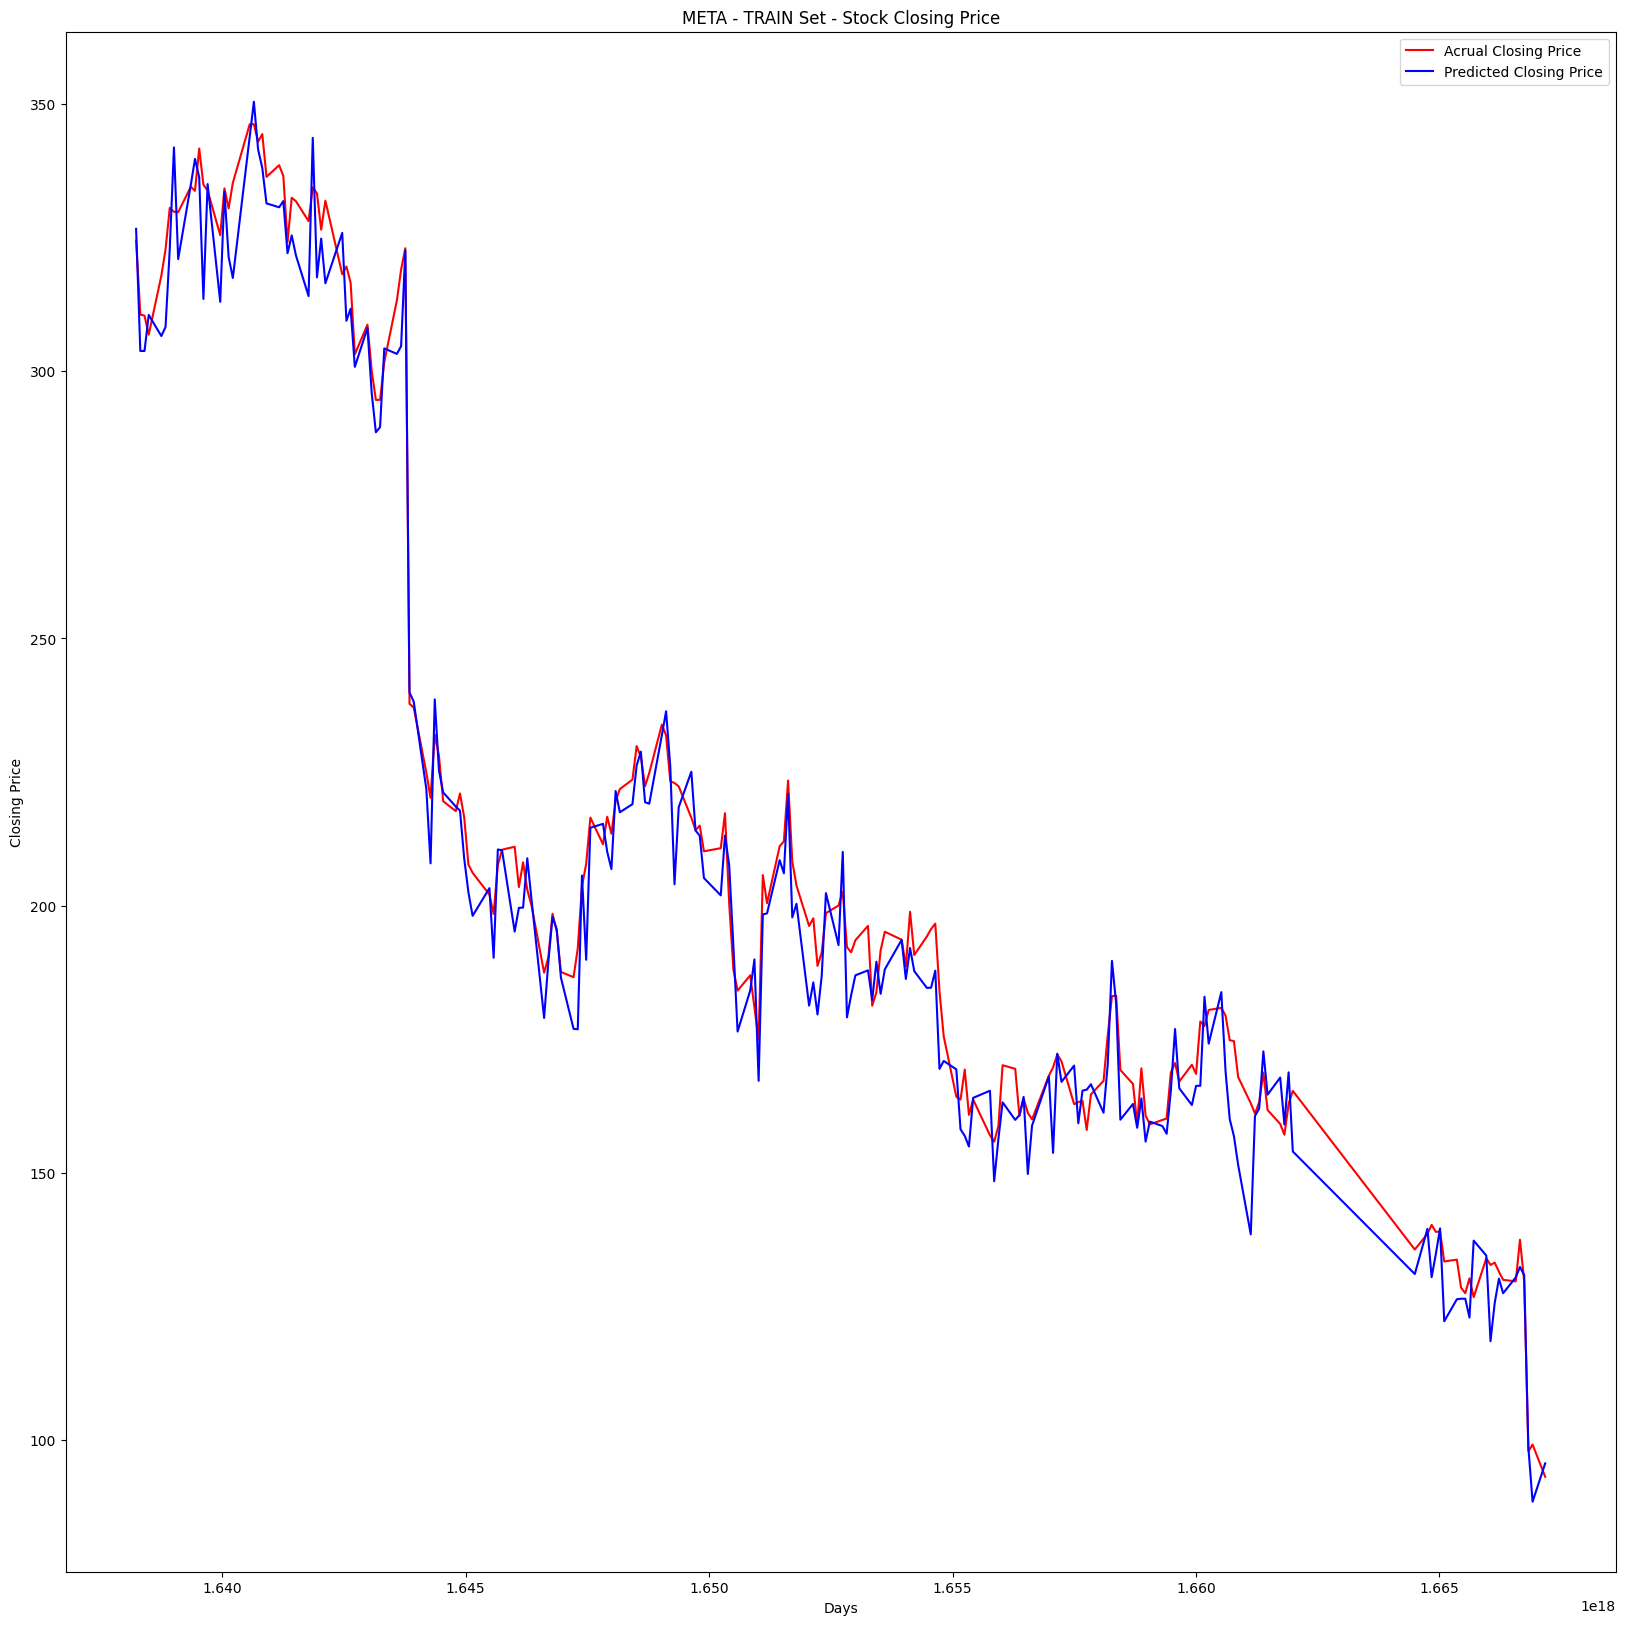

In [84]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.set_title('META - TRAIN Set - Stock Closing Price')
#ax.scatter(x=data[:,0],y=data[:,1],label='Data')

plt.plot(num_date, y_close_price_data, color='r', label='Acrual Closing Price')
plt.plot(num_date, total_data_predicted2,color='b', label='Predicted Closing Price')

#plt.plot(data[:,0], m*data[:,0] + b,color='red',label='Our Fitting Line')
ax.set_xlabel('Days')
ax.set_ylabel('Closing Price')
ax.legend(loc='best')
plt.show()